**Prakhar Sapkota** <br>
**2358543** <br>
**Task-1** <br>

# Data Preparation and cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
dataset_path = '/content/drive/MyDrive/AIML-sem6/coursework/Insect Classification'
print(os.listdir(dataset_path))

['train', 'test']


In [ ]:
from PIL import Image
import os

def check_image_integrity(image_file):
    try:
        picture = Image.open(image_file)
        picture.verify()
        return True
    except Exception as error:
        print(f"Corrupted image: {image_file} | Error: {error}")
        return False

# iterate through all files in dataset
for folder_path, subfolders, file_list in os.walk(dataset_path):
    for filename in file_list:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            full_path = os.path.join(folder_path, filename)
            if not check_image_integrity(full_path):
                os.remove(full_path)
                print(f"Deleted corrupted image: {full_path}")

Corrupt image: /content/drive/MyDrive/AIML-sem6/coursework/Insect Classification/train/aphids/jpg_30 - Copy (4).jpg | Error: cannot identify image file '/content/drive/MyDrive/AIML-sem6/coursework/Insect Classification/train/aphids/jpg_30 - Copy (4).jpg'
Removed corrupted image: /content/drive/MyDrive/AIML-sem6/coursework/Insect Classification/train/aphids/jpg_30 - Copy (4).jpg
Corrupt image: /content/drive/MyDrive/AIML-sem6/coursework/Insect Classification/train/aphids/jpg_22 - Copy (2).jpg | Error: cannot identify image file '/content/drive/MyDrive/AIML-sem6/coursework/Insect Classification/train/aphids/jpg_22 - Copy (2).jpg'
Removed corrupted image: /content/drive/MyDrive/AIML-sem6/coursework/Insect Classification/train/aphids/jpg_22 - Copy (2).jpg
Corrupt image: /content/drive/MyDrive/AIML-sem6/coursework/Insect Classification/train/aphids/jpg_33 - Copy (3).jpg | Error: cannot identify image file '/content/drive/MyDrive/AIML-sem6/coursework/Insect Classification/train/aphids/jpg_33

# Data Exploration

Train class counts: {'aphids': 254, 'bollworm': 231, 'sawfly': 186, 'armyworm': 210, 'stem_borer': 168, 'mites': 240, 'beetle': 277, 'grasshopper': 264, 'mosquito': 281}
Test class counts: {'mosquito': 50, 'mites': 42, 'aphids': 44, 'bollworm': 36, 'beetle': 50, 'grasshopper': 46, 'stem_borer': 36, 'sawfly': 37, 'armyworm': 43}


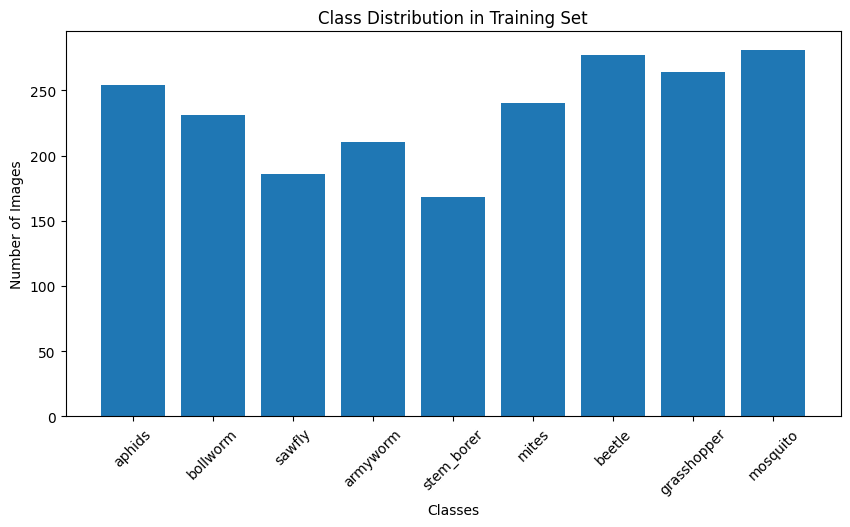

In [ ]:
import os
import matplotlib.pyplot as plt

# Function to count the number of images in each category folder
def count_files_per_category(data_folder):
    # Get list of all categories (subfolders)
    categories = os.listdir(data_folder)
    counts = {}

    # Loop through each category
    for category in categories:
        # Build full path to the category directory
        category_path = os.path.join(data_folder, category)

        # Check if it's a valid directory
        if os.path.isdir(category_path):
            # Count number of files in that directory
            counts[category] = len(os.listdir(category_path))

    return counts

# Define training and testing dataset directories
training_directory = os.path.join(dataset_path, 'train')
testing_directory = os.path.join(dataset_path, 'test')

# Count images per class in both sets
training_image_counts = count_files_per_category(training_directory)
validation_image_counts = count_files_per_category(testing_directory)

# Print out the image counts for verification
print("Training category counts:", training_image_counts)
print("Testing category counts:", validation_image_counts)

# Plotting the class distribution in the training set
plt.figure(figsize=(10,5))
plt.bar(training_image_counts.keys(), training_image_counts.values())
plt.title('Category Distribution in Training Set')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Configuration parameters
batch_size = 32
target_images_per_class = 1000  # Desired number of images per class

# Initialize the image data generator with augmentation settings
image_augmenter = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop through each class folder in the training directory
for class_label in os.listdir(train_dir):
    class_folder = os.path.join(train_dir, class_label)

    # Skip if not a directory
    if not os.path.isdir(class_folder):
        continue

    # Count current number of images in the class folder
    current_image_count = len(os.listdir(class_folder))

    # Skip augmentation if target count is already met or exceeded
    if current_image_count >= target_images_per_class:
        print(f"{class_label} already has {current_image_count} images.")
        continue

    # Calculate how many images are needed to reach the target
    images_needed = target_images_per_class - current_image_count
    batches_to_generate = images_needed // batch_size + 1  # Total batches required

    # Create a flow for this specific class to generate augmented images
    augment_flow = image_augmenter.flow_from_directory(
        os.path.dirname(class_folder),         # Parent directory of the class folder
        classes=[class_label],                  # Only this class
        target_size=(224, 224),                 # Resize images
        batch_size=batch_size,
        save_to_dir=class_folder,               # Save augmented images here
        save_prefix='aug',
        save_format='jpg'
    )

    print(f"Augmenting {class_label}... Adding {images_needed} images.")

    # Generate the required number of augmented image batches
    for i in range(batches_to_generate):
        next(augment_flow)  # Triggers image generation

Found 254 images belonging to 1 classes.
Augmenting aphids... Adding 746 images.
Found 231 images belonging to 1 classes.
Augmenting bollworm... Adding 769 images.
Found 186 images belonging to 1 classes.
Augmenting sawfly... Adding 814 images.
Found 210 images belonging to 1 classes.
Augmenting armyworm... Adding 790 images.
Found 168 images belonging to 1 classes.
Augmenting stem_borer... Adding 832 images.
Found 240 images belonging to 1 classes.
Augmenting mites... Adding 760 images.
Found 277 images belonging to 1 classes.
Augmenting beetle... Adding 723 images.
Found 264 images belonging to 1 classes.
Augmenting grasshopper... Adding 736 images.
Found 281 images belonging to 1 classes.
Augmenting mosquito... Adding 719 images.


In [ ]:
# Count the number of images in each class after augmentation
training_category_counts = count_files_per_category(train_dir)

# Print updated class distribution in training set
print("Updated Training category counts:", training_category_counts)

Updated Train class counts: {'aphids': 1016, 'bollworm': 956, 'sawfly': 994, 'armyworm': 968, 'stem_borer': 936, 'mites': 960, 'beetle': 991, 'grasshopper': 984, 'mosquito': 1003}


# Data Generators

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration settings
image_size = (224, 224)
batch_size = 32

# Initialize data generators with preprocessing settings
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

# Create training data generator with shuffling enabled (default)
train_data_flow = train_image_generator.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Create validation data generator with shuffling disabled
validation_data_flow = validation_image_generator.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: disable shuffling for validation
)

Found 8808 images belonging to 9 classes.
Found 384 images belonging to 9 classes.


# Sample Image Visualization

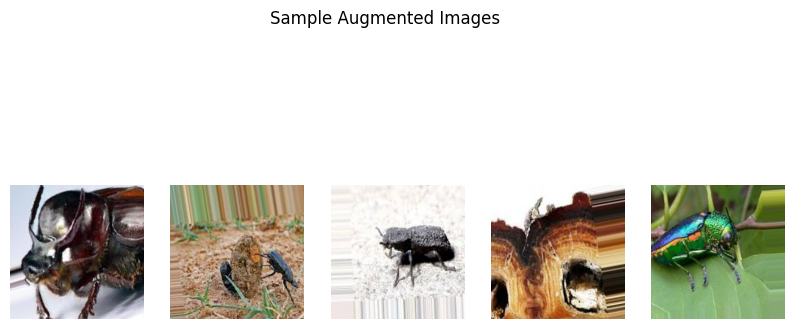

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to a sample class directory for visualization
class_folder_path = os.path.join(train_dir, 'beetle')

# Get paths to augmented images in that folder
augmented_image_paths = [os.path.join(class_folder_path, f) for f in os.listdir(class_folder_path) if f.startswith('aug')]

# Display the first 5 augmented images
plt.figure(figsize=(10, 5))
for index, img_path in enumerate(augmented_image_paths[:5]):
    loaded_image = image.load_img(img_path)
    plt.subplot(1, 5, index + 1)
    plt.imshow(loaded_image)
    plt.axis('off')  # Hide axes for better visualization

plt.suptitle("Sample Augmented Images")
plt.show()

# Baseline CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,179,593 (42.65 MB)

 Trainable params: 11,179,593 (42.65 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 54s 165ms/step - accuracy: 0.1486 - loss: 2.1793 - val_accuracy: 0.2917 - val_loss: 1.9418
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.2367 - loss: 2.0206 - val_accuracy: 0.4271 - val_loss: 1.6689
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 42s 153ms/step - accuracy: 0.3116 - loss: 1.8649 - val_accuracy: 0.5260 - val_loss: 1.4631
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 42s 151ms/step - accuracy: 0.3530 - loss: 1.7669 - val_accuracy: 0.5833 - val_loss: 1.2662
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 40s 145ms/step - accuracy: 0.3863 - loss: 1.6746 - val_accuracy: 0.6615 - val_loss: 1.1311
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 39s 143ms/step - accuracy: 0.4187 - loss: 1.5918 - val_accuracy: 0.6797 - val_loss: 1.1383
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - accuracy: 0.4558 - loss: 1.4956 - val_accuracy: 0.7708 - val_loss: 0.9219
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 40s 145ms/step - accuracy: 0.4794 - loss: 1

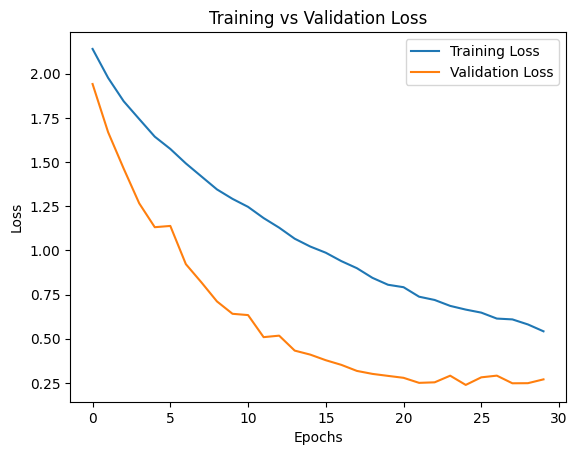

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(val_generator)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9739 - loss: 0.2185
Test Accuracy: 0.9635, Test Loss: 0.2380


# Performance Evaluation

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict classes
val_generator.reset()
preds = model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step
              precision    recall  f1-score   support

      aphids       0.94      1.00      0.97        44
    armyworm       0.97      0.91      0.94        43
      beetle       1.00      1.00      1.00        50
    bollworm       0.97      1.00      0.99        36
 grasshopper       0.92      1.00      0.96        46
       mites       0.93      0.98      0.95        42
    mosquito       1.00      0.94      0.97        50
      sawfly       0.97      0.89      0.93        37
  stem_borer       0.97      0.94      0.96        36

    accuracy                           0.96       384
   macro avg       0.96      0.96      0.96       384
weighted avg       0.96      0.96      0.96       384



# Deeper CNN Model

In [ ]:
deep_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu'),  # New layer
    MaxPooling2D((2,2)),
    Conv2D(512, (3,3), activation='relu'),  # New layer
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

deep_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,295,753 (31.65 MB)

 Trainable params: 8,295,753 (31.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
deep_model.compile(optimizer=Adam(learning_rate=1e-4),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_history = deep_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 53s 159ms/step - accuracy: 0.1178 - loss: 2.1897 - val_accuracy: 0.1875 - val_loss: 2.0727
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 39s 140ms/step - accuracy: 0.2153 - loss: 2.0664 - val_accuracy: 0.2786 - val_loss: 1.9210
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 39s 140ms/step - accuracy: 0.2709 - loss: 1.9358 - val_accuracy: 0.4375 - val_loss: 1.5826
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - accuracy: 0.3506 - loss: 1.7441 - val_accuracy: 0.5677 - val_loss: 1.2987
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 39s 141ms/step - accuracy: 0.4426 - loss: 1.5468 - val_accuracy: 0.6484 - val_loss: 1.1101
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 40s 144ms/step - accuracy: 0.4898 - loss: 1.4029 - val_accuracy: 0.7161 - val_loss: 0.9525
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 39s 142ms/step - accuracy: 0.5636 - loss: 1.2430 - val_accuracy: 0.7682 - val_loss: 0.7187
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 39s 141ms/step - accuracy: 0.6153 - loss: 1

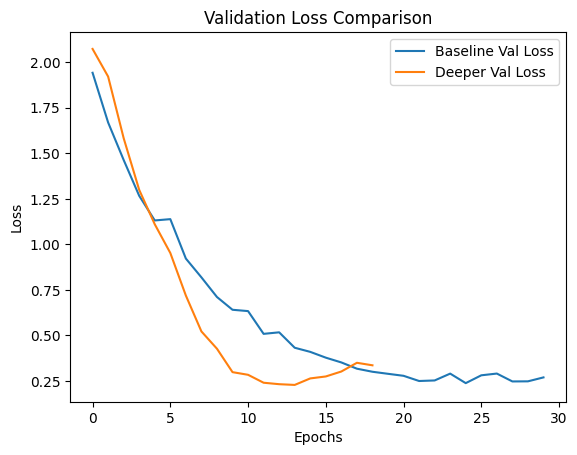

In [ ]:
plt.plot(history.history['val_loss'], label='Baseline Val Loss')
plt.plot(deep_history.history['val_loss'], label='Deeper Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Recreate the deeper model architecture
deep_model_sgd = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu'),  # New layer
    MaxPooling2D((2,2)),
    Conv2D(512, (3,3), activation='relu'),  # New layer
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,538,781 (127.94 MB)

 Trainable params: 11,179,593 (42.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,359,188 (85.29 MB)

In [ ]:
from tensorflow.keras.optimizers import SGD

# Compile with SGD
deep_model_sgd.compile(optimizer=SGD(learning_rate=1e-3, momentum=0.9),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
# Train the model with SGD
sgd_history = deep_model_sgd.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 46s 151ms/step - accuracy: 0.1109 - loss: 2.1978 - val_accuracy: 0.1354 - val_loss: 2.1919
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 40s 144ms/step - accuracy: 0.1321 - loss: 2.1946 - val_accuracy: 0.2214 - val_loss: 2.1854
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 39s 142ms/step - accuracy: 0.1438 - loss: 2.1911 - val_accuracy: 0.2109 - val_loss: 2.1642
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 39s 141ms/step - accuracy: 0.1731 - loss: 2.1718 - val_accuracy: 0.2422 - val_loss: 2.1054
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 39s 141ms/step - accuracy: 0.1995 - loss: 2.1200 - val_accuracy: 0.2500 - val_loss: 2.0494
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 39s 140ms/step - accuracy: 0.2122 - loss: 2.0739 - val_accuracy: 0.2917 - val_loss: 2.0037
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 38s 137ms/step - accuracy: 0.2264 - loss: 2.0438 - val_accuracy: 0.3021 - val_loss: 1.9455
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 139ms/step - accuracy: 0.2426 - loss: 2

# Optimizer Comparison (SDG vs Adam)

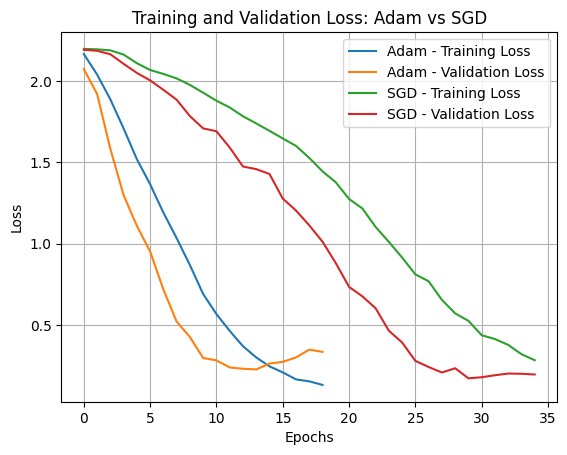

In [ ]:
import matplotlib.pyplot as plt

plt.plot(deep_history.history['loss'], label='Adam - Training Loss')
plt.plot(deep_history.history['val_loss'], label='Adam - Validation Loss')
plt.plot(sgd_history.history['loss'], label='SGD - Training Loss')
plt.plot(sgd_history.history['val_loss'], label='SGD - Validation Loss')

plt.title('Training and Validation Loss: Adam vs SGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

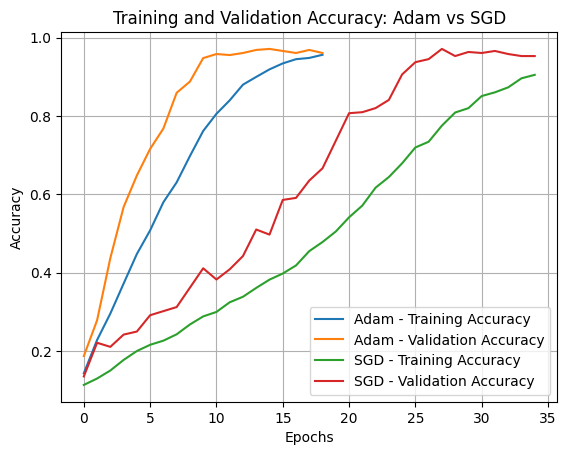

In [ ]:
plt.plot(deep_history.history['accuracy'], label='Adam - Training Accuracy')
plt.plot(deep_history.history['val_accuracy'], label='Adam - Validation Accuracy')
plt.plot(sgd_history.history['accuracy'], label='SGD - Training Accuracy')
plt.plot(sgd_history.history['val_accuracy'], label='SGD - Validation Accuracy')

plt.title('Training and Validation Accuracy: Adam vs SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# For SGD model
test_loss_sgd, test_acc_sgd = deep_model_sgd.evaluate(val_generator)
print(f"SGD - Test Accuracy: {test_acc_sgd:.4f}, Test Loss: {test_loss_sgd:.4f}")

# For Adam model (assuming deep_model is the one trained with Adam)
test_loss_adam, test_acc_adam = deep_model.evaluate(val_generator)
print(f"Adam - Test Accuracy: {test_acc_adam:.4f}, Test Loss: {test_loss_adam:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9736 - loss: 0.1401
SGD - Test Accuracy: 0.9635, Test Loss: 0.1734
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.9761 - loss: 0.2147
Adam - Test Accuracy: 0.9688, Test Loss: 0.2282


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

val_generator.reset()
preds = deep_model_sgd.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

print("SGD optmizer vs Adam optimizer")

from sklearn.metrics import classification_report
import numpy as np

val_generator.reset()
preds = deep_model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step
              precision    recall  f1-score   support

      aphids       0.94      1.00      0.97        44
    armyworm       0.95      0.93      0.94        43
      beetle       0.96      1.00      0.98        50
    bollworm       1.00      0.97      0.99        36
 grasshopper       0.94      0.98      0.96        46
       mites       0.95      0.95      0.95        42
    mosquito       1.00      0.98      0.99        50
      sawfly       0.97      0.89      0.93        37
  stem_borer       0.97      0.94      0.96        36

    accuracy                           0.96       384
   macro avg       0.96      0.96      0.96       384
weighted avg       0.96      0.96      0.96       384

SGD optmizer vs Adam optimizer
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step
              precision    recall  f1-score   support

      aphids       0.90      1.00      0.95        44
    armyworm       1.00      0.93      0.96        43
      beetle       

# Transfer Learning with VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add new top layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=predictions)
transfer_model.compile(optimizer=Adam(learning_rate=1e-4),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
transfer_history = transfer_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 68s 198ms/step - accuracy: 0.3918 - loss: 1.7175 - val_accuracy: 0.9297 - val_loss: 0.4217
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 48s 175ms/step - accuracy: 0.7676 - loss: 0.7559 - val_accuracy: 0.9609 - val_loss: 0.2078
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 51s 185ms/step - accuracy: 0.8665 - loss: 0.4802 - val_accuracy: 0.9766 - val_loss: 0.1588
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 50s 181ms/step - accuracy: 0.9231 - loss: 0.3162 - val_accuracy: 0.9714 - val_loss: 0.1514
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 82s 181ms/step - accuracy: 0.9362 - loss: 0.2444 - val_accuracy: 0.9766 - val_loss: 0.1425
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 50s 181ms/step - accuracy: 0.9582 - loss: 0.1800 - val_accuracy: 0.9688 - val_loss: 0.1421
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 51s 184ms/step - accuracy: 0.9733 - loss: 0.1395 - val_accuracy: 0.9714 - val_loss: 0.1454
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 50s 182ms/step - accuracy: 0.9842 - loss: 0

In [ ]:
for layer in base_model.layers[-20:]:  # unfreeze last 20 layers
    layer.trainable = True

transfer_model.compile(optimizer=Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

fine_tune_history = transfer_model.fit(
    train_generator,
    epochs=20,
    initial_epoch=transfer_history.epoch[-1],
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 10/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 193s 548ms/step - accuracy: 0.9737 - loss: 0.1039 - val_accuracy: 0.9714 - val_loss: 0.1975
Epoch 11/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 136s 492ms/step - accuracy: 0.9915 - loss: 0.0337 - val_accuracy: 0.9714 - val_loss: 0.2634
Epoch 12/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 136s 494ms/step - accuracy: 0.9943 - loss: 0.0207 - val_accuracy: 0.9714 - val_loss: 0.2646
Epoch 13/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 136s 493ms/step - accuracy: 0.9931 - loss: 0.0245 - val_accuracy: 0.9740 - val_loss: 0.2874
Epoch 14/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 136s 493ms/step - accuracy: 0.9967 - loss: 0.0128 - val_accuracy: 0.9766 - val_loss: 0.2463
Epoch 15/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 136s 493ms/step - accuracy: 0.9962 - loss: 0.0120 - val_accuracy: 0.9792 - val_loss: 0.2194


# Model Comparison

In [ ]:
print("Model comparision")
print("Base model")
test_loss, test_acc = model.evaluate(val_generator)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")
print("Deeper model")
test_loss, test_acc = deep_model.evaluate(val_generator)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")
print("Transfer model")
test_loss, test_acc = transfer_model.evaluate(val_generator)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

Model comparision
Base model
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9739 - loss: 0.2185
Test Accuracy: 0.9635, Test Loss: 0.2380
Deeper model
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9761 - loss: 0.2147
Test Accuracy: 0.9688, Test Loss: 0.2282
Transfer model
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.9812 - loss: 0.1434
Test Accuracy: 0.9714, Test Loss: 0.1975


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

val_generator.reset()
preds = transfer_model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step
              precision    recall  f1-score   support

      aphids       0.88      1.00      0.94        44
    armyworm       1.00      0.95      0.98        43
      beetle       1.00      1.00      1.00        50
    bollworm       0.95      0.97      0.96        36
 grasshopper       1.00      1.00      1.00        46
       mites       1.00      0.98      0.99        42
    mosquito       1.00      0.98      0.99        50
      sawfly       1.00      0.89      0.94        37
  stem_borer       0.92      0.94      0.93        36

    accuracy                           0.97       384
   macro avg       0.97      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384



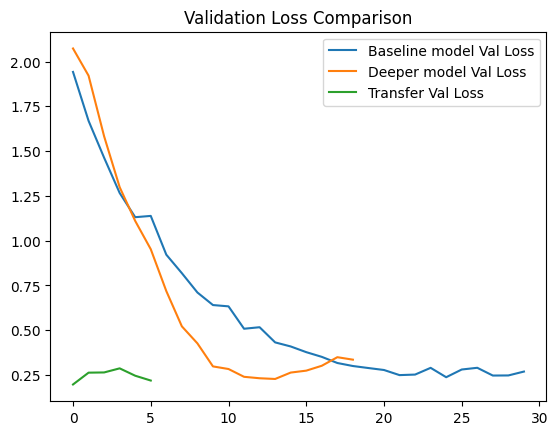

In [ ]:
plt.plot(history.history['val_loss'], label='Baseline model Val Loss')
plt.plot(deep_history.history['val_loss'], label='Deeper model Val Loss')
plt.plot(fine_tune_history.history['val_loss'], label='Transfer Val Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()

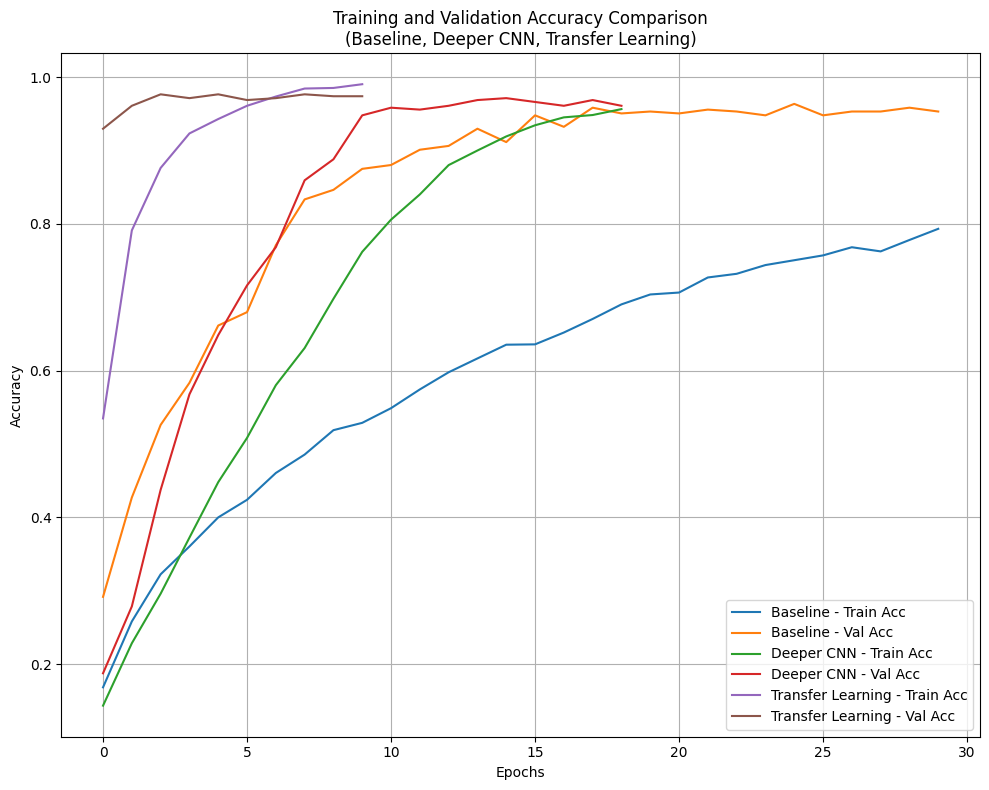

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 8))

plt.plot(history.history['accuracy'], label='Baseline - Train Acc')
plt.plot(history.history['val_accuracy'], label='Baseline - Val Acc')
plt.plot(deep_history.history['accuracy'], label='Deeper CNN - Train Acc')
plt.plot(deep_history.history['val_accuracy'], label='Deeper CNN - Val Acc')
plt.plot(transfer_history.history['accuracy'], label='Transfer Learning - Train Acc')
plt.plot(transfer_history.history['val_accuracy'], label='Transfer Learning - Val Acc')

plt.title('Training and Validation Accuracy Comparison\n(Baseline, Deeper CNN, Transfer Learning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Saving and Prediction

In [ ]:
model.save("model.keras")
model.save("deep_model.keras")
model.save("transfer_model.keras")

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image file (replace with your own path)
img_path = '/content/drive/MyDrive/AIML-sem6/coursework/beetle.png'
img = image.load_img(img_path, target_size=(224, 224))

# Convert to array and preprocess
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
preds = transfer_model.predict(img_array)
predicted_class_index = np.argmax(preds, axis=1)

# Map index back to class label
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[predicted_class_index[0]]

print("Predicted insect class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted insect class: beetle
